In [2]:
import time

# Importuri
import numpy as np
import matplotlib.pylab as plt
import math

In [3]:
# Macros

PI = math.pi
colors = ['b', 'g', 'r', 'y']

In [4]:
# Ex1

N = [128, 256, 512, 1024, 2048, 4096, 8192]  # Numarul de esantioane pentru transformata Fourier
# Implementarea noastra default pentru transformata fourier discreta


def calculate_component(N):
    matrix = np.zeros((N, N), dtype=np.complex128)
    for w in range(N):
        for n in range(N):
            matrix[w, n] = np.exp(-2j * PI * n * w / N)
    return matrix

time_vector = []
time_vector_fft = []
for i in range(0, len(N)):
    start = time.time()
    matrix = calculate_component(N[i])
    stop = time.time()
    time_vector.append(stop - start)
    
for i in range(0, len(N)):
    start = time.time()
    matrix = np.fft.fft(np.eye(N[i]))
    stop = time.time()
    time_vector_fft.append(stop - start)
    
for i in range(0, len(N)):
    print("Folosind metoda clasica pentru N={} avem timpul de executie: {}, iar folosind np.fft.fft avem timpul de executie {}".format(N[i], time_vector[i], time_vector_fft[i]))

Folosind metoda clasica pentru N=128 avem timpul de executie: 0.08682441711425781, iar folosind np.fft.fft avem timpul de executie 0.13454079627990723
Folosind metoda clasica pentru N=256 avem timpul de executie: 0.29578161239624023, iar folosind np.fft.fft avem timpul de executie 0.0
Folosind metoda clasica pentru N=512 avem timpul de executie: 1.111781120300293, iar folosind np.fft.fft avem timpul de executie 0.0
Folosind metoda clasica pentru N=1024 avem timpul de executie: 4.100486755371094, iar folosind np.fft.fft avem timpul de executie 0.02136397361755371
Folosind metoda clasica pentru N=2048 avem timpul de executie: 7.331912517547607, iar folosind np.fft.fft avem timpul de executie 0.09565353393554688
Folosind metoda clasica pentru N=4096 avem timpul de executie: 27.692211866378784, iar folosind np.fft.fft avem timpul de executie 0.34223389625549316
Folosind metoda clasica pentru N=8192 avem timpul de executie: 111.18849802017212, iar folosind np.fft.fft avem timpul de executie

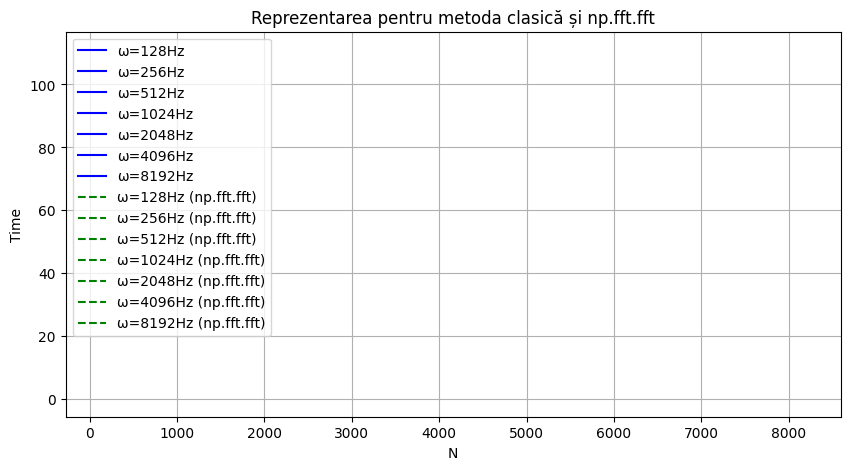

In [5]:
# Grafice exercitiu 1
fig, ax = plt.subplots(figsize=(10, 5))

for i in range(len(N)):
    ax.plot(N[i], time_vector[i], color=colors[0], label=f'ω={N[i]}Hz')
    
for i in range(len(N)):
    ax.plot(N[i], time_vector_fft[i], linestyle='--', color=colors[1], label=f'ω={N[i]}Hz (np.fft.fft)')


ax.set_xlabel('N')
ax.set_ylabel('Time')
ax.set_title('Reprezentarea pentru metoda clasică și np.fft.fft')
ax.grid(True)

# Adăugați o legendă pentru a indica fiecare reprezentare
ax.legend()

plt.show()

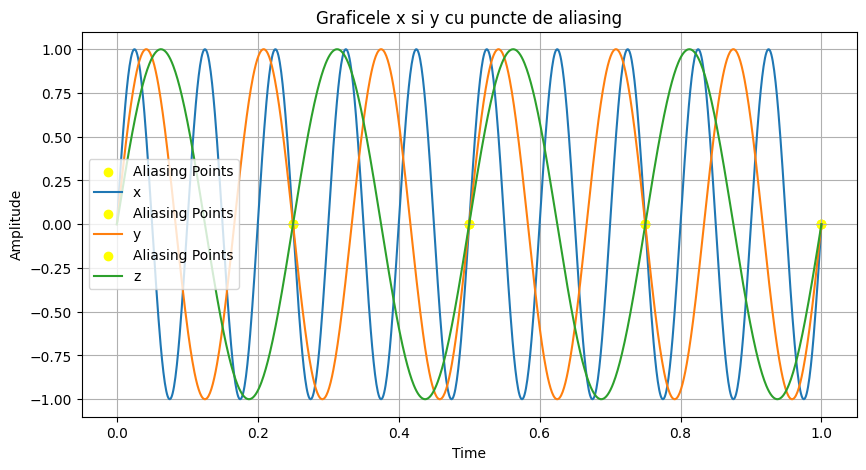

In [6]:
# Ex 2
def x(t, frequency=10, amplitude=1, phase=0):
    return amplitude * np.sin(2 * PI * frequency * t + phase)

def y(t, frequency=6, amplitude=1, phase=0):
    return amplitude * np.sin(2 * PI * frequency * t + phase)

def z(t, frequency=4, amplitude=1, phase=0):
    return amplitude * np.sin(2 * PI * frequency * t + phase)

vals = np.linspace(start=0, stop=1, num=1000)

def plot_graphs(arr_f, frequency=0):
    plt.figure(figsize=(10, 5))
    
    for f in arr_f:
        arr = []
        for t in vals:
            if frequency == 0:
                arr.append(f(t))
            else:
                arr.append(f(t, frequency))
                
        # Identificarea punctelor de aliasing
        aliasing_points_x = [0.25, 0.5, 0.75, 1]
        aliasing_points_y = [f(t) for t in aliasing_points_x]
        #print(aliasing_points_x, aliasing_points_y)
        plt.scatter(aliasing_points_x, aliasing_points_y, color='yellow', marker='o', label='Aliasing Points')
        
        plt.plot(vals, arr, label=f.__name__)
    
    plt.title('Graficele x si y cu puncte de aliasing')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    
    plt.show()

plot_graphs(arr_f=[x, y, z], frequency=0)